In [ ]:
import pandas as pd
df = pd.read_csv('train.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.head()
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.isnull().sum()
#cabin,age

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: xlabel='Survived', ylabel='count'>

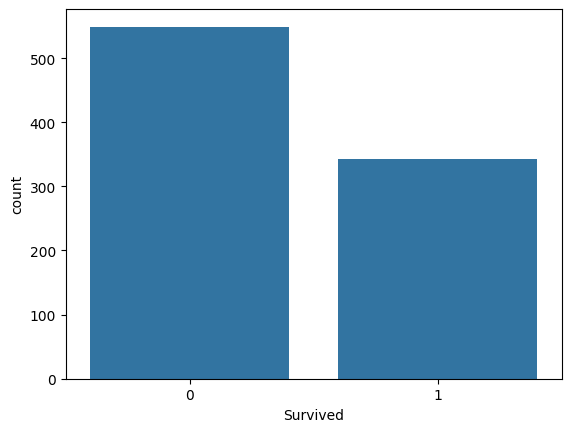

In [ ]:
import seaborn as sns
sns.countplot(x='Survived', data=df)


<Axes: xlabel='Age', ylabel='Count'>

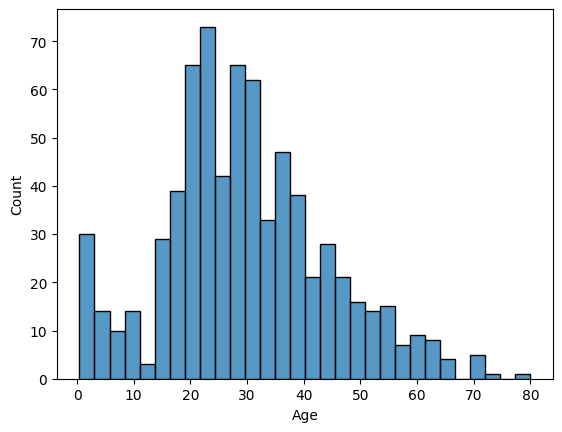

In [ ]:
sns.histplot(df['Age'].dropna(), bins=30)

<Axes: xlabel='Sex', ylabel='count'>

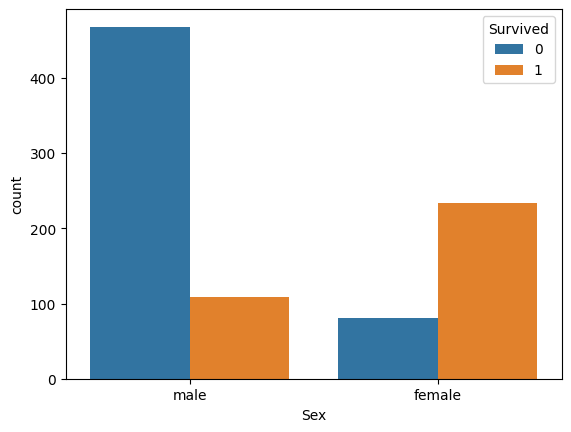

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

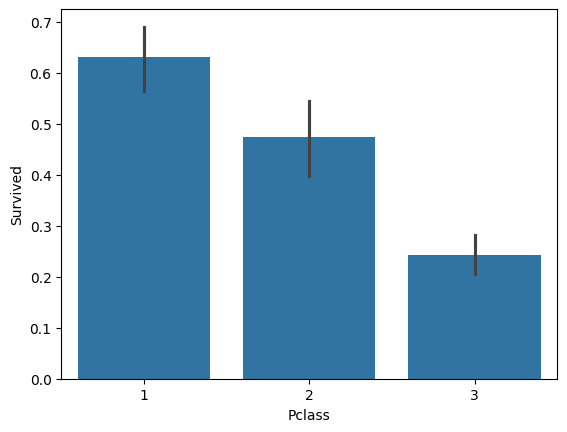

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=df)

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

<Axes: xlabel='SibSp', ylabel='Survived'>

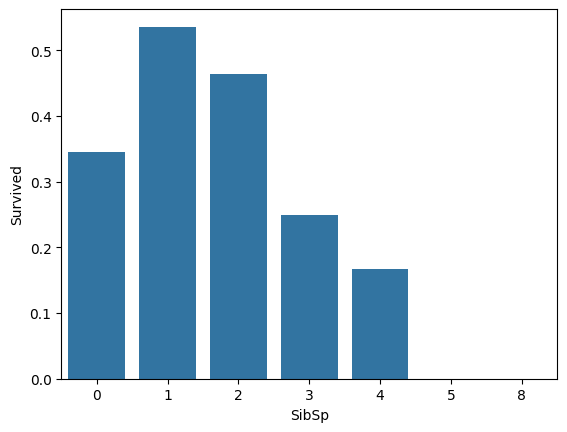

In [ ]:
#1.형제자매/배우자(SibSp) 수에 따른 생존율 차이는?
sibsp_survival = df.groupby('SibSp')['Survived'].mean().reset_index()
sns.barplot(data=sibsp_survival, x='SibSp', y='Survived')
#형제자매가 1명일때의 생존률이 가장 높다

<ipython-input-13-33895863a5b4>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival = df.groupby('Fare_bin')['Survived'].mean().reset_index()


<Axes: xlabel='Fare_bin', ylabel='Survived'>

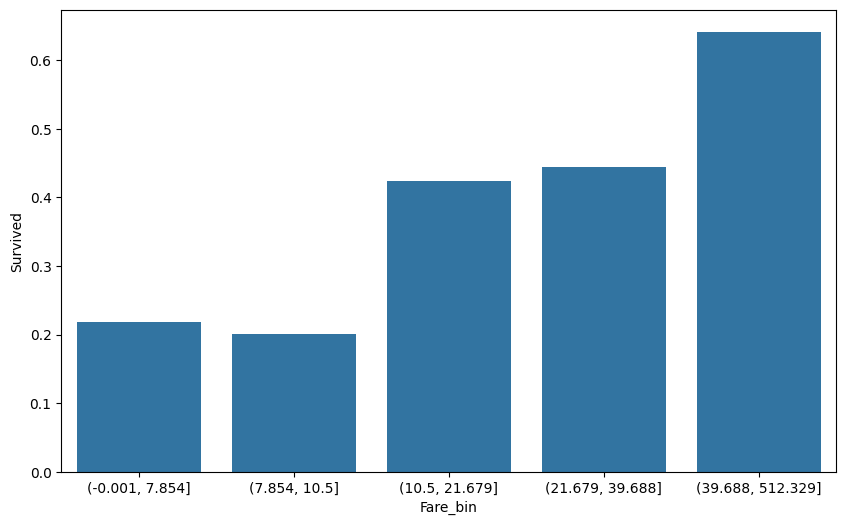

In [ ]:
#2.요금(Fare)을 많이 낸 사람일수록 생존 확률이 높았는가?
df['Fare_bin'] = pd.qcut(df['Fare'], q=5)
fare_survival = df.groupby('Fare_bin')['Survived'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=fare_survival, x='Fare_bin', y='Survived')
#가장 높은 요금을 낸 사람들이 생존률이 높았다

<Axes: xlabel='Alone', ylabel='Survived'>

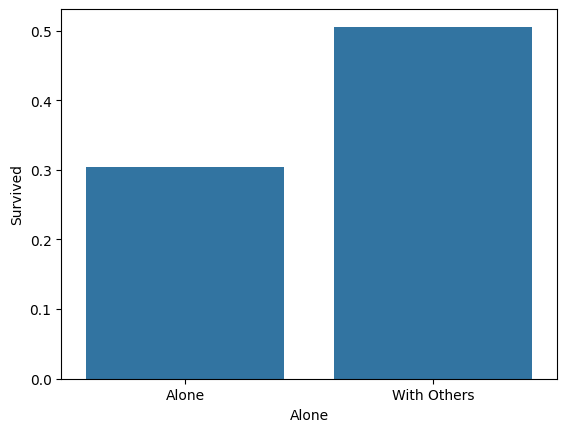

In [ ]:
#3.혼자 탑승한 사람과 동행인이 있는 사람 중 누가 더 많이 생존했는가?
df['Alone'] = (df['SibSp'] + df['Parch'] > 0).astype(int)
alone_survival = df.groupby('Alone')['Survived'].mean().reset_index()
alone_survival['Alone'] = alone_survival['Alone'].map({0: 'Alone', 1: 'With Others'})
sns.barplot(data=alone_survival, x='Alone', y='Survived')
#

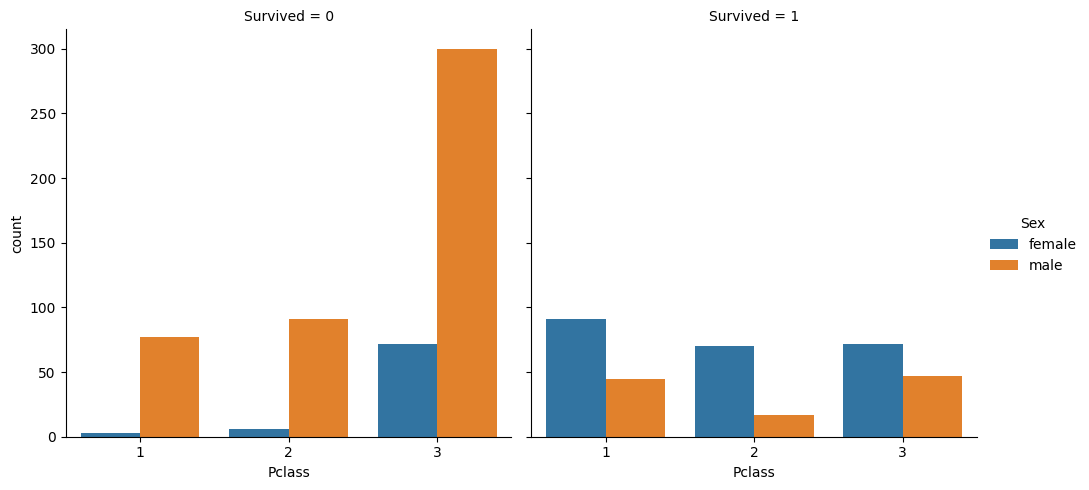

In [ ]:
import matplotlib.pyplot as plt
pd.crosstab(df['Pclass'], df['Sex'], values=df['Survived'], aggfunc='mean')
sns.catplot(x="Pclass", hue="Sex", col="Survived", kind="count", data=df)
plt.show()

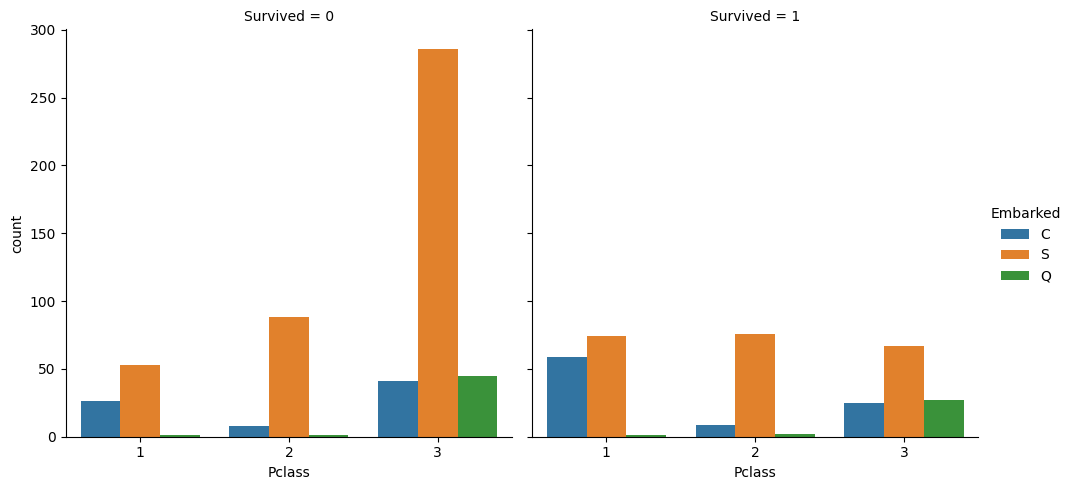

In [ ]:
pd.crosstab(df['Pclass'], df['Embarked'], values=df['Survived'], aggfunc='mean')
sns.catplot(x="Pclass", hue="Embarked", col="Survived", kind="count", data=df)
plt.show()